<center>
<img src="../images/ods_stickers.jpg" />
    
# Introducción al Machine Learning 2020

Basado en material de Pattern Classsification Duda, Hart, Stork. Traducido y editado al español por [Ana Georgina Flesia](https://www.linkedin.com/in/georginaflesia/). Este material esta sujeto a los términos y condiciones de la licencia  [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Se permite el uso irrestricto para todo propósito no comercial.Copyright (c) 2019 [Georgina Flesia](georgina.flesia@unc.edu.ar)


# IntML2020 - Clasificación sobre Winsconsin breast cancer dataset - Logistic regression


# Ejercicio 1: 

Sea $y$ la etiqueta de clase, $y=1$ cuando $\mathbf{x}$ pertenece a la clase 1 e $y=0$ cuando no pertenece a la clase 1. La función densidad de logistic regression se supone tiene la forma 
$$
p(y=1 | \tilde{\mathbf{x}})=\frac{1}{1+\exp \left(-\tilde{\mathbf{w}}^{T} \tilde{\mathbf{x}}\right)}
$$

* a)  Plotee esta curva unidimensional con  $w$ tomando los valores 10, 1 y 0.1 en la misma gráfica, para compararlas, en el rango [-5,5]. 


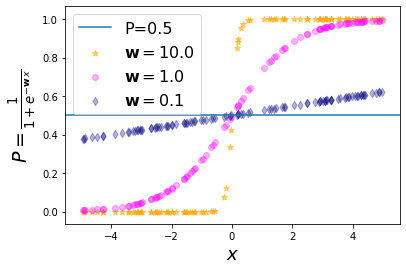

In [3]:
from random import uniform
import math
import matplotlib.pyplot as plt
random1=[]
random2=[]
random3=[]
xlist = []
w=[10, 1,0.1]
for i in range(100):
    x = uniform(-5,5)
    xlist.append(x)
    logreg1 = 1/(1+math.exp(-(w[0]*x)))
    logreg2 = 1/(1+math.exp(-(w[1]*x)))
    logreg3 = 1/(1+math.exp(-(w[2]*x)))
    random1.append(logreg1)
    random2.append(logreg2)
    random3.append(logreg3)
plt.scatter(xlist, random1, marker='*',s=40, c='orange',alpha=0.5,label=r'$\mathbf{w} = %3.1f$'%(w[0]))
plt.scatter(xlist, random2, c='magenta',alpha=0.3,label=r'$\mathbf{w} = %3.1f$'%(w[1]))
plt.scatter(xlist, random3, c='navy',marker='d', alpha=0.3,label=r'$\mathbf{w} = %3.1f$'%(w[2]))
plt.axhline(y=0.5, label='P=0.5')
plt.ylabel(r'$P=\frac{1}{1+e^{-\mathbf{w} \, x}}$', fontsize=19)
plt.xlabel(r'$x$',fontsize=18)
plt.legend(fontsize=16)
plt.show()

* b) Para estudiar la incidencia del parámetro de regularizacion $\ell_2$, que en sklearn se llama C y acompaña al término logistico, se pueden hacer curvas de coeficientes en funcion del C.
Cabe destacar que hay muchas formas equivalentes de generar discriminantes mediante regularización  a partir de la definición de la densidad como regresión logistica, la que usa sklearn es

 $\min_{w, c} \frac{1}{2}w^T w + C \sum_{i=1}^n \log(\exp(- y_i (X_i^T w + c)) + 1) $

 Observe que si no declara un valor para el parámetro, el clasificador logistic regression se inicializa con los siguientes parámetros 

 __init__(self, penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)


El siguiente código realiza curvas de coeficientes en funcion de log(C), e imprime en patalla los scores correspondientes a acada modelo encontrado.  Realice una curva similar con los scores obtenidos para cada log(C), y plotee ambas curvas en paneles contiguos, para mejor observación. 

A continuación se utiliza la función  LogisticRegressionCV que implementa cross validation para seleccionar el mejor C en forma automática. Compare los resultados obtenidos en la curva de C, y compare el score del mejor. Que concluye? 

La función LogisticRegressionCV tambien guarda los valores de las curvas de C implementadas, y los coeficientes de los modelos. Realice un plot parecido al anterior para mostrar que rango de la curva 'a mano' fue estudiado por LogisticRegressionCV, y si logró encontrar el modelo estable. A fin de cuentas, el modelo de regresion logistica no deberia depender de la regularizacion usada para su cómputo. 

(100, 4)
Curvas de regularizacion en funcion de log(C) ...
This took 0.033s


<Figure size 864x504 with 0 Axes>

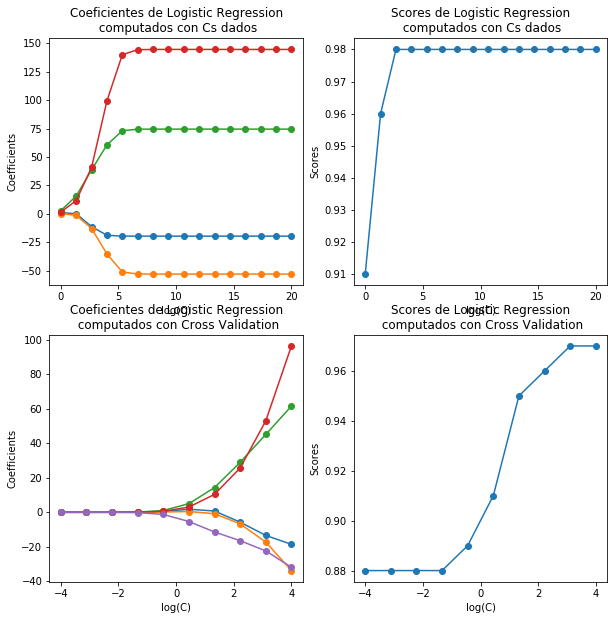

[3.11]
0.97


LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=10000.0,
                     l1_ratios=None, max_iter=1000000, multi_class='auto',
                     n_jobs=None, penalty='l2', random_state=None, refit=True,
                     scoring=None, solver='liblinear', tol=1e-06, verbose=0)

In [100]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn import datasets

###################################################################
#DATASET

iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y != 0] #saco la clase 3, quedan dos clases, cuatro variables.
y = y[y != 0]

X /= X.max()  # Normalice X para acelerar la convergencia
print(X.shape)

##############################################################
print("Curvas de regularizacion en funcion de log(C) ...")


cs = np.logspace(0, 20, 16)
start = time()
clf = linear_model.LogisticRegression(penalty='l2', solver='liblinear',
                                      tol=1e-6, max_iter=int(1e6),
                                      warm_start=True,
                                      intercept_scaling=10000.)
coefs_ = []
scores_ = []

for c in cs:
    clf.set_params(C=c)
    clf.fit(X, y)
    coefs_.append(clf.coef_.ravel().copy())
    scores_.append(clf.score(X,y).ravel().copy())
    
print("This took %0.3fs" % (time() - start))
fig = plt.figure(figsize=(12,7))
coefs_ = np.array(coefs_)
scores_= np.array(scores_)

plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(np.log10(cs), coefs_, marker='o')
plt.title('Coeficientes de Logistic Regression\n computados con Cs dados')
plt.xlabel('log(C)')
plt.ylabel('Coefficients')

plt.subplot(2,2,2)
plt.title('Scores de Logistic Regression\n computados con Cs dados')
plt.plot(np.log10(cs), scores_, marker='o')
plt.xlabel('log(C)')
plt.ylabel('Scores')

#########################################################
#cross validation for parameter estimation of logistic regression
from sklearn.linear_model import LogisticRegressionCV

#LogisticRegressionCV implements Logistic Regression with built-in cross-validation support,
#to find the optimal C and l1_ratio parameters according to the scoring attribute.
#The “newton-cg”, “sag”, “saga” and “lbfgs” solvers are found to be faster for high-dimensional dense data,
#due to warm-starting (see Glossary).

clf = LogisticRegressionCV(cv=5,penalty='l2', solver='liblinear',
                                      tol=1e-6, max_iter=int(1e6),
                                      intercept_scaling=10000.)
clf.fit(X, y)

coefs_ = clf.coefs_paths_[2].mean(axis=0)
coefs_ = np.array(coefs_)

cs = np.array(clf.Cs_.copy())
# Calculamos el promedio del score para cada c
# en cada fold
scores_ = clf.scores_[2].mean(axis=0)
plt.subplot(2,2,3)
plt.plot(np.log10(cs), coefs_, marker='o')
plt.title('Coeficientes de Logistic Regression\n computados con Cross Validation')
plt.xlabel('log(C)')
plt.ylabel('Coefficients')

plt.subplot(2,2,4)
plt.title('Scores de Logistic Regression\n computados con Cross Validation')
plt.plot(np.log10(cs), scores_, marker='o')
plt.xlabel('log(C)')
plt.ylabel('Scores')

ymin, ymax = plt.ylim()
plt.show()

CC = clf.C_

print(np.log10(CC))

print(clf.score(X,y))
clf

* b) Estudie la incidencia del parámetro de regularizacion $\ell_1$, que en sklearn se llama C y acompaña al término logistico. Cabe destacar que hay muchas formas equivalentes de generar discriminantes mediante regularización  a partir de la definición de la densidad como regresión logistica.

 $\min_{w, c} \|w\|_1 + C \sum_{i=1}^n \log(\exp(- y_i (X_i^T w + c)) + 1)$

* c) Estudie la incidencia del parámetro de regularizacion Elastic_net, $\rho$ que es una combinación de regularización $\ell_1$ y $\ell_2$, y del parámetro C que acompaña al término logistico. Cabe destacar que hay muchas formas equivalentes de generar discriminantes mediante regularización  a partir de la definición de la densidad como regresión logistica.

 $\min_{w, c} \frac{1 - \rho}{2}w^T w + \rho \|w\|_1 + C \sum_{i=1}^n \log(\exp(- y_i (X_i^T w + c)) + 1)$

## Respuesta

<span style="color:red"> RESPONDA EL INCISO  (a) AQUÍ </span>

Podemos ver que si bien el rango de C elegido por GridSearch es diferente, los resultados en cuanto a Coeficientes y Score son muy similares, que es lo que esperabamos que ocurra.
No se ve en el gráfico si llega a estabilizarse como "a mano", pero los valores son iguales

<span style="color:red"> RESPONDA EL INCISO  (b) AQUÍ </span>

La **regularización**, en cualquiera de sus formas, nos permite mejorar la capacidad de generalización del modelo suavizando la frontera de desición.
Lo que se hace es penalizar los valores muy grandes de $||w||_{1}$ para evitar que la funcion sobreajuste y tienda a un escalón.
El parámetro **C** o $\lambda$ de la regularización indica qué tanto vamos a penalizar los valores más grandes. Cuanto más grande C, menos estamos penalizando estos valores. Es decir, C es inversamente proporcional a la intensidad deseada de la regularización. 
- C pequeño: mayor regularización, menor overfitting, podria llevar a menor ajuste
- C grande: menor regularización, mayor overfitting, menor capacidad de generalización

Ambas formas de regularización son similares, sin embargo, *Elastic-net* sólo se puede usar con SAGA solver que tiene mejor performance con conjuntos grandes de datos pero requiere que los datos tengan la misma escala. Además, si uno utiliza Elastic-net debe indicar qué peso va a asignarle a L1 o L2 mediante el parametro *l1_ratio*. Si l1_ratio = 0, la regularización va a ser igual a L2. Si l1_ratio=1, la regularización va a ser L1.

## Ejercicio 2: 
Sobre el grupo de datos sobre cancer de mama 'data_breast_cancer.csv', aplique knn, lda, Gaussian Naive Bayes, perceptron y logistic regression, separando en 80% train y 20% test cinco veces. Arme las matrices de confusion y curvas ROC y discuta los resultados haciendo énfasis en cuales son los métodos Gaussianos, cuales los no paramétricos y cuales los determinísticos. 
Como combinaria los resultados de los 5 folds en un solo conjunto de métricas y curvas?

Attribute Information:

ID number 2) Diagnosis (M = malignant, B = benign) 3–32)
Ten real-valued features are computed for each cell nucleus:

* radius (mean of distances from center to points on the perimeter)
* texture (standard deviation of gray-scale values)
* perimeter
* area
* smoothness (local variation in radius lengths)
* compactness (perimeter² / area — 1.0)
* concavity (severity of concave portions of the contour)
* concave points (number of concave portions of the contour)
* symmetry
* fractal dimension (“coastline approximation” — 1)

The mean, standard error and “worst” or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#importing the dataset 
df = pd.read_csv('../data/data_breast_cancer.csv')
dataset = df.drop(['Unnamed: 32'], axis=1)
X = dataset.iloc[:, 2:32].values
Y = dataset.iloc[:, 1].values
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
print("Cancer data set dimensions : {}".format(dataset.shape))

Cancer data set dimensions : (569, 32)


In [16]:
dataset.groupby('diagnosis').size()


diagnosis
B    357
M    212
dtype: int64

In [17]:
#Visualization of data
#dataset.groupby('diagnosis').hist(figsize=(12, 12))


In [18]:
dataframe = pd.DataFrame(Y)
#Encoding categorical data values 
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
Y1 = labelencoder_Y.fit_transform(Y)


In [19]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)


In [38]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y1, test_size = 0.25, random_state = 0)


In [22]:
#Fitting K-NN Algorithm
from sklearn.neighbors import KNeighborsClassifier
#Fitting LDA Algorithm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#Fitting Naive_Bayes
from sklearn.naive_bayes import GaussianNB
#Fitting Perceptron
from sklearn.linear_model import Perceptron
#Fitting the Logistic Regression Algorithm to the Training Set
from sklearn.linear_model import LogisticRegression

In [29]:
classifiers = [
    ('KNN',KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)),
    ('LDA',LinearDiscriminantAnalysis(solver="svd", store_covariance=True)),
    ('Naive Bayes',GaussianNB()),
    ('Perceptron',Perceptron(tol=1e-3)),
    ('Logistic regression',LogisticRegression(random_state = 0, solver='lbfgs')),
] 

In [30]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
Normalized confusion matrix
[[0.99 0.01]
 [0.11 0.89]]


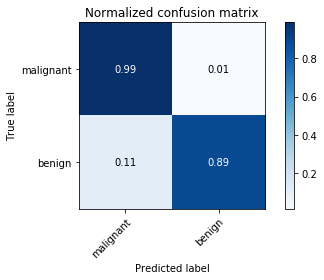

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=True, tol=0.0001)
Normalized confusion matrix
[[1.   0.  ]
 [0.08 0.92]]


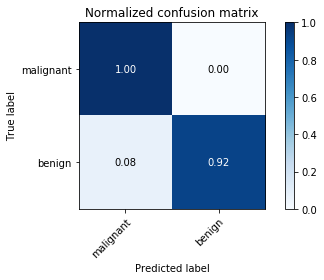

GaussianNB(priors=None, var_smoothing=1e-09)
Normalized confusion matrix
[[0.93 0.07]
 [0.11 0.89]]


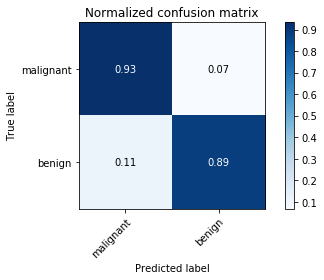

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)
Normalized confusion matrix
[[0.97 0.03]
 [0.06 0.94]]


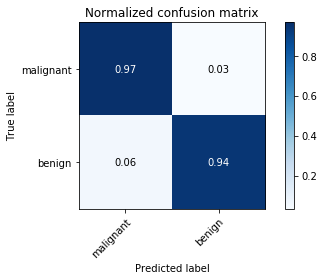

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Normalized confusion matrix
[[0.98 0.02]
 [0.06 0.94]]


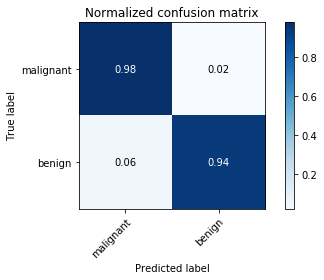

In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
Y_labels = np.array(['malignant', 'benign'])

#classes = Y_labels[unique_labels(Y_test, Y_pred)]

    # iterate over classifiers
lst=[]
for name,clf in classifiers:
    clf.fit(X_train, Y_train)
    lst.append(clf.score(X_test, Y_test))
    Y_pred = clf.predict(X_test)
    np.set_printoptions(precision=2)
    print(clf)
    # Plot normalized confusion matrix
    plot_confusion_matrix(Y_test, Y_pred, classes=Y_labels, normalize=True,title='Normalized confusion matrix')
    # Plot non-normalized confusion matrix
    #plot_confusion_matrix(Y_test, Y_pred, classes=Y,title='Confusion matrix, without normalization')
    plt.show()

# Plot normalized confusion matrix
#plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,title='Normalized confusion matrix')


In [34]:
print(lst)

[0.951048951048951, 0.972027972027972, 0.916083916083916, 0.958041958041958, 0.965034965034965]


## Reorganice el código anterior y responda las preguntas aquí

<span style="color:red"> RESPONDA EL INCISO  AQUÍ </span>

In [35]:
def plot_confusion_matrix(y_true, y_pred, classes,ax=None,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    if ax is None:
        ax = plt.gca()

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        ax.set_title("Normalized confusion matrix")
    #else:
        ax.set_title('Confusion matrix, without normalization')
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
#     plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
#              rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    return ax



In [36]:
def plot_roc_curve(fp_rate,tp_rate,name,zoom,ax):
    if zoom:        
        plt.xlim(0, 0.2)
        plt.ylim(0.8, 1)
        ax.set_title('ROC curve (zoomed in at top left)')
    else:
        ax.set_title('ROC curve')
    ax.plot([0, 1], [0, 1], 'k--')
    ax.plot(fp_rate, tp_rate, label=name)
    ax.set_xlabel('False positive rate')
    ax.set_ylabel('True positive rate')
    ax.legend(loc='best')


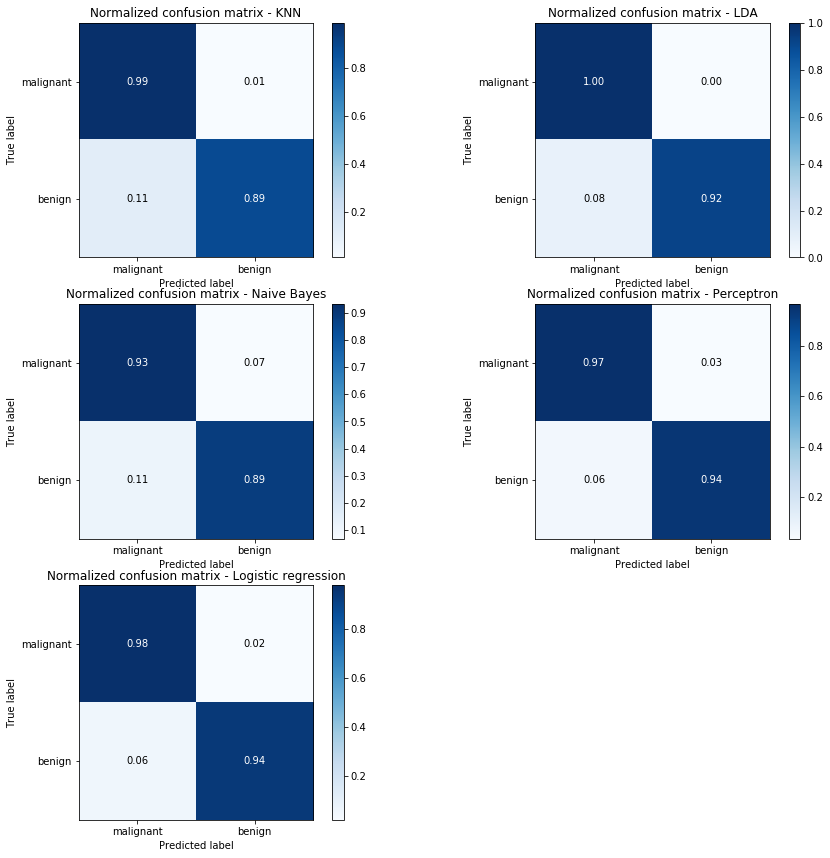

In [41]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.utils.multiclass import unique_labels
y_labels = np.array(['malignant', 'benign'])

#classes = Y_labels[unique_labels(Y_test, Y_pred)]

# iterate over classifiers
scores=[]
plt.figure(figsize=(15,25))
for k,(name, clf) in enumerate(classifiers):
    clf.fit(X_train, Y_train)
    scores.append((name,clf.score(X_test, Y_test),clf.score(X_train,Y_train)))
    y_pred = clf.predict(X_test)
    np.set_printoptions(precision=2)
    # Plot normalized confusion matrix
    plt.subplot(5,2,k+1)    
    plot_confusion_matrix(Y_test, y_pred,
                          classes=y_labels,
                          normalize=True,
                          title='Normalized confusion matrix - {}'.format(name))
    # Plot non-normalized confusion matrix
    #plot_confusion_matrix(Y_test, Y_pred, classes=Y,title='Confusion matrix, without normalization')



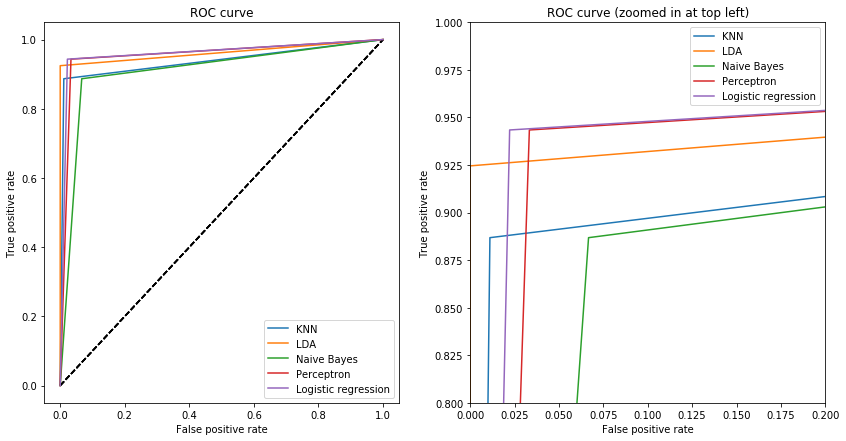

In [44]:
lst = []
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(14,7))
for name,clf in classifiers:
    clf.fit(X_train, Y_train)
    lst.append(clf.score(X_test, Y_test))
    y_pred = clf.predict(X_test)
    fp_rate, tp_rate, _ = roc_curve(Y_test, y_pred)
    plot_roc_curve(fp_rate,tp_rate,name,zoom=False,ax=ax1)
    plot_roc_curve(fp_rate,tp_rate,name,zoom=True,ax=ax2)

In [45]:
#errors
from prettytable import PrettyTable
    
table = PrettyTable()

table.field_names = ["Model", "Test Score", "Train Score"]
for name,test_score,train_score in scores:
    table.add_row([name,test_score,train_score])
table.sortby = "Test Score"
table.reversesort = True
print(table)

+---------------------+-------------------+--------------------+
|        Model        |     Test Score    |    Train Score     |
+---------------------+-------------------+--------------------+
|         LDA         | 0.972027972027972 | 0.9624413145539906 |
| Logistic regression | 0.965034965034965 | 0.9906103286384976 |
|      Perceptron     | 0.958041958041958 | 0.9882629107981221 |
|         KNN         | 0.951048951048951 | 0.9741784037558685 |
|     Naive Bayes     | 0.916083916083916 | 0.9483568075117371 |
+---------------------+-------------------+--------------------+


### Modelos:
Se entrenaron 5 modelos:
- KNN: no paramétrico 
- LDA: paramétrico 
- Gaussian Naive Bayes: Gaussiano
- perceptron: No paramétrico
- logistic regression: No paramétrico

Cuando decimos que un método es no parametrico, no nos referimos a que no requiere parametros para funcionar sino que **no está asumiendo que los datos provienen de una distribución paramétrica predefinida a la cual solamente tenemos que estimarle los parametros**. Cuando decimos que un método es Gaussiano, nos referimos a que asume que la distribución de probabilidad de los datos es una Gaussiana, y cuando decimos que un modelo es paramétrico, nos referimos a que estima parámetros probabilisticos sobre la distribución de los datos mediante la muestra.

### Mejor desempeño
Si bien todos los métodos funcionan bastante bien, es decir, podemos obtener resultados satisfactorios con todos, LDA y Logistic Regression son los que arrojan mejores resultados en cuanto a score. Esto podría llevarnos a pensar que nuestros datos son linealmente separables, pero dado el error persistente en el conjunto de entrenamiento, podemos concluir que si bien nuestros datos no son COMPLETAMENTE linealmente separables, hay una gran parte que sí, y de hecho lo mejor que podemos hacer es separarlos mediante una recta. 

Sin embargo, observando las otras metricas podemos ver que si bien LDA y Logistic Regression obtienen el mejor score, LDA es excepcionalmente bueno detectando tumores malignos, es decir no arroja falsos negativos. En este caso particular yo optaría por este modelo sin duda.


Porque no obtenemos 100% de accuracy? Pues porque evidentemente estos modelos no han encontrado forma de discriminar sin error los datos. Esto puede ser por una mala seleccion de variables (variables de más introduciendo ruido) o bien porque los datos NO son separables sin error.  
Habría que optimizar la selección de caracteristicas para ver mejor.

## Ejercicio 3: 
Realice el mismo estudio con el archivo gender purchase. 

In [46]:
import pandas as pd
gender_df = pd.read_csv('../data/gender_purchase.csv')
gender_df.head()

,Gender,Purchase
0,Female,Yes
1,Female,Yes
2,Female,No
3,Male,No
4,Male,Yes


In [47]:
table = pd.crosstab(gender_df['Gender'], gender_df['Purchase'])
print(table)

Purchase   No  Yes
Gender            
Female    106  159
Male      125  121



## Respuesta

<span style="color:red"> RESPONDA EL INCISO  AQUÍ </span>

In [54]:
X = gender_df['Gender']
y = gender_df['Purchase']

In [55]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

X = LabelEncoder().fit_transform(X).reshape(-1, 1)
y = LabelEncoder().fit_transform(y)
y_labels = np.array(['no', 'yes'])
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [59]:
classifiers = [
    ('KNN',KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)),
    ('LDA',LinearDiscriminantAnalysis(solver="svd", store_covariance=True)),
    ('Naive Bayes',GaussianNB()),
    ('Perceptron',Perceptron(tol=1e-3)),
    ('Logistic regression',LogisticRegression(random_state = 0, solver='lbfgs')),
] 

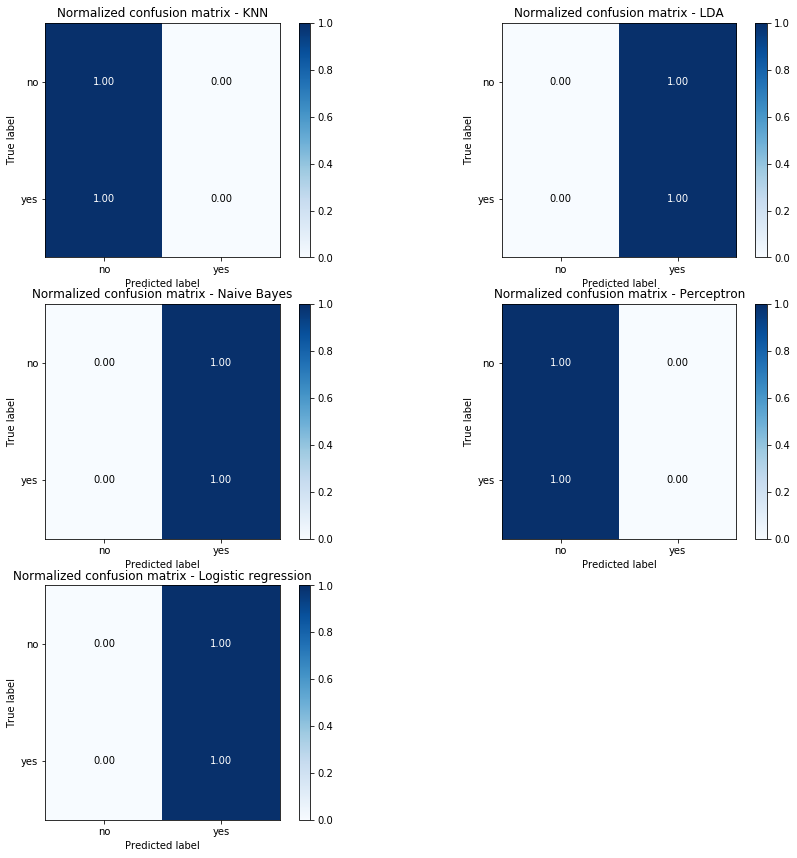

In [60]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.utils.multiclass import unique_labels

#classes = Y_labels[unique_labels(Y_test, Y_pred)]

# iterate over classifiers
scores=[]
plt.figure(figsize=(15,25))
for k,(name, clf) in enumerate(classifiers):
    clf.fit(X_train, Y_train)
    scores.append((name,clf.score(X_test, Y_test),clf.score(X_train,Y_train)))
    y_pred = clf.predict(X_test)
    np.set_printoptions(precision=2)
    # Plot normalized confusion matrix
    plt.subplot(5,2,k+1)    
    plot_confusion_matrix(Y_test, y_pred,
                          classes=y_labels,
                          normalize=True,
                          title='Normalized confusion matrix - {}'.format(name))
    # Plot non-normalized confusion matrix
    #plot_confusion_matrix(Y_test, Y_pred, classes=Y,title='Confusion matrix, without normalization')



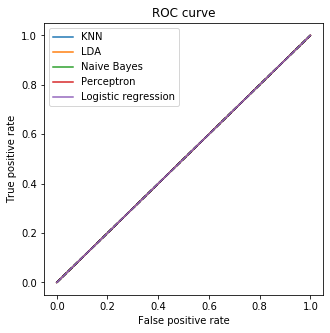

In [102]:
lst = []
fig, ax1 = plt.subplots(1, 1,figsize=(5,5))
for name,clf in classifiers:
    clf.fit(X_train, Y_train)
    lst.append(clf.score(X_test, Y_test))
    y_pred = clf.predict(X_test)
    fp_rate, tp_rate, _ = roc_curve(Y_test, y_pred)
    plot_roc_curve(fp_rate,tp_rate,name,zoom=False,ax=ax1)


In [64]:
#errors
from prettytable import PrettyTable
    
table = PrettyTable()

table.field_names = ["Model", "Test Score", "Train Score"]
for name,test_score,train_score in scores:
    table.add_row([name,test_score,train_score])
table.sortby = "Test Score"
table.reversesort = True
print(table)

+---------------------+--------------------+--------------------+
|        Model        |     Test Score     |    Train Score     |
+---------------------+--------------------+--------------------+
|      Perceptron     | 0.5145631067961165 | 0.4362745098039216 |
|         KNN         | 0.5145631067961165 | 0.4362745098039216 |
|     Naive Bayes     | 0.4854368932038835 | 0.5637254901960784 |
| Logistic regression | 0.4854368932038835 | 0.5637254901960784 |
|         LDA         | 0.4854368932038835 | 0.5637254901960784 |
+---------------------+--------------------+--------------------+


### MUY malo!
Es lógico que el clasificador sea muy malo porque los datos claramente no ofrecen ninguna clase de informacion que nos permita discriminar ambas clases.
Tanto hombres como mujeres compran en proporciones similares, entonces ningun clasificador puede ser mejor que las probabilidades a priori de las clases, ya que esa es la unica información con la cual contamos.